In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

# 1. Salt and pepper noise generation

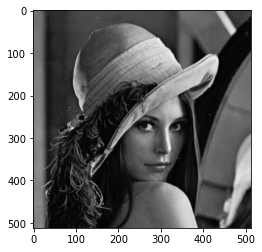

In [34]:
lena_gray = cv2.imread('images/lena_gray.tif', 0)
plt.imshow(lena_gray, 'gray');

In [96]:
def add_sp_noise(img, sp_density):
    img_copy = np.copy(img)
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            if random.uniform(0, 1) > sp_density:
                img_copy[i][j] = random.randint(0, 1)
    return img_copy

def add_sp_noise2(img, sp_density):
    img_copy = np.copy(img)
    noise = np.array([[random.randint(0, 1) for i in range(img.shape[0])] for j in range(img.shape[1])])
    mask = np.array([[0 if random.uniform(0, 1) > sp_density else 1 for i in range(img.shape[0])] for j in range(img.shape[1])])
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            if mask[i][j] == 0:
                img_copy[i][j] = noise[i][j]
    return img_copy

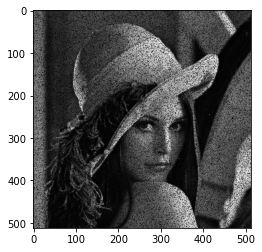

In [97]:
lena_gray_sp = add_sp_noise2(lena_gray, 0.8)
plt.imshow(lena_gray_sp, 'gray');

In [81]:
def filter_mean(img, size):
    sz = (size - 1) // 2
    img_copy = np.copy(img)
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            x_beg, y_beg = i-sz, j-sz
            x_end, y_end = i+sz, j+sz
            if x_beg < 0:
                x_beg = 0
            if y_beg < 0:
                y_beg = 0
            if x_end + 1 >= img_copy.shape[0]:
                x_end = img_copy.shape[0]-1
            if y_end + 1 >= img_copy.shape[1]:
                y_end = img_copy.shape[1]-1
            img_copy[i][j] = np.mean(img[x_beg:x_end+1, y_beg:y_end+1])
    return img_copy

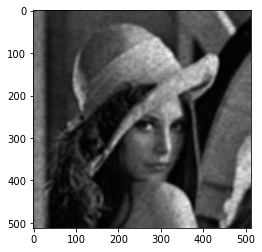

In [85]:
lena_gray_mean = filter_mean(lena_gray_sp, 9)
plt.imshow(lena_gray_mean, 'gray');

In [89]:
def filter_median(img, size):
    sz = (size - 1) // 2
    img_copy = np.copy(img)
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            x_beg, y_beg = i-sz, j-sz
            x_end, y_end = i+sz, j+sz
            if x_beg < 0:
                x_beg = 0
            if y_beg < 0:
                y_beg = 0
            if x_end + 1 >= img_copy.shape[0]:
                x_end = img_copy.shape[0]-1
            if y_end + 1 >= img_copy.shape[1]:
                y_end = img_copy.shape[1]-1
            img_copy[i][j] = np.median(img[x_beg:x_end+1, y_beg:y_end+1])
    return img_copy

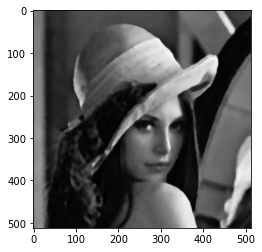

In [90]:
lena_gray_median = filter_median(lena_gray_sp, 9)
plt.imshow(lena_gray_median, 'gray');

In [ ]:
def filter_gaussian(img, size):
    pass